In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import numpy as np

# Loading the data
df = pd.read_csv('adwords_exercise.csv')

# Checking first rows
print(df.head())

# Checking for missing values
print(df.isnull().sum())

# Checking data types
print(df.dtypes)

          Day  Campaign  AdGroup  Clicks  Impressions     CTR  Avg. CPC  Cost  \
0    5/8/2013         1      100       0            1      0%      0.00  0.00   
1    8/8/2013         1      100       1            3  33.33%      0.03  0.03   
2   10/8/2013         1      100       0            4      0%      0.00  0.00   
3  14/08/2013         1      100       0            1      0%      0.00  0.00   
4  18/08/2013         1      100       0            1      0%      0.00  0.00   

   Avg. position  Conversions  Cost/conversion Conversion rate  \
0            1.0            0              0.0              0%   
1            1.0            0              0.0              0%   
2            1.0            0              0.0              0%   
3            1.0            0              0.0              0%   
4            1.0            0              0.0              0%   

   View-through conv.  Total conv. value  
0                   0                0.0  
1                   0         

In [2]:
df["Day"] = pd.to_datetime(df["Day"], dayfirst=True, errors="coerce")  # Ensuring it's a datetime
df["Day"] = df["Day"].dt.strftime("%d/%m/%y")  # Converting to consistent short format

In [3]:
# Checking data 
print(df.head())
# Check data types
print(df.dtypes)

        Day  Campaign  AdGroup  Clicks  Impressions     CTR  Avg. CPC  Cost  \
0  05/08/13         1      100       0            1      0%      0.00  0.00   
1  08/08/13         1      100       1            3  33.33%      0.03  0.03   
2  10/08/13         1      100       0            4      0%      0.00  0.00   
3  14/08/13         1      100       0            1      0%      0.00  0.00   
4  18/08/13         1      100       0            1      0%      0.00  0.00   

   Avg. position  Conversions  Cost/conversion Conversion rate  \
0            1.0            0              0.0              0%   
1            1.0            0              0.0              0%   
2            1.0            0              0.0              0%   
3            1.0            0              0.0              0%   
4            1.0            0              0.0              0%   

   View-through conv.  Total conv. value  
0                   0                0.0  
1                   0                0.0  

In [4]:
# Setting float formatting: two decimals, no commas
pd.options.display.float_format = '{:.0f}'.format

columns_to_describe = ['Clicks', 'Impressions', 'Cost', 'Conversions', 'Avg. CPC', 'Cost/conversion']
print("Summary Statistics:")
print(df[columns_to_describe].describe())

Summary Statistics:
       Clicks  Impressions  Cost  Conversions  Avg. CPC  Cost/conversion
count    5215         5215  5215         5215      5215             5215
mean       26         2186     1            1         0                0
std       105         8400     4            4         0                1
min         0            0     0            0         0                0
25%         1            3     0            0         0                0
50%         3           25     0            0         0                0
75%        12          829     1            0         0                0
max      1602       148518    78           75         1               24


In [5]:
# Converting CTR from string percentage to a float
df['CTR_numeric'] = df['CTR'].str.rstrip('%').astype('float') / 100

# Sorting the DataFrame by date to ensure a proper time series order
df.sort_values('Day', inplace=True)

   Campaign  Conversions
0         1         2509
1         3           53
2         7           42
3        15         1205


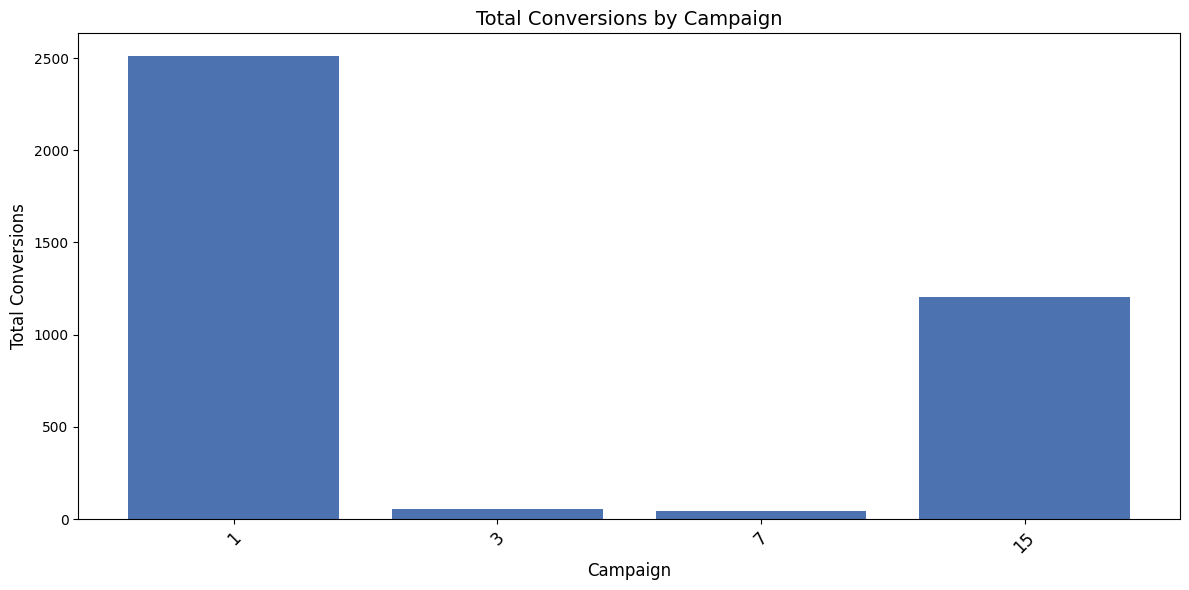

In [6]:
# Grouping by Campaign and summing up the conversions
campaign_summary = df.groupby('Campaign')['Conversions'].sum().reset_index()
print(campaign_summary)

# Converting campaign numbers to strings to use as categorical labels
campaign_labels = campaign_summary['Campaign'].astype(str)

plt.figure(figsize=(12, 6))
plt.bar(campaign_labels, campaign_summary['Conversions'], color='#4C72B0') 
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Total Conversions', fontsize=12)
plt.title('Total Conversions by Campaign', fontsize=14)
plt.xticks(fontsize=12, rotation=45) 
plt.tight_layout()
plt.savefig('total_convertsions_by_campaign.png', dpi=300)
plt.show()

   Campaign  Cost  Conversions  Cost_per_Conversion
0         1  1669         2509                    1
1         3   321           53                    6
2         7   930           42                   22
3        15  4345         1205                    4


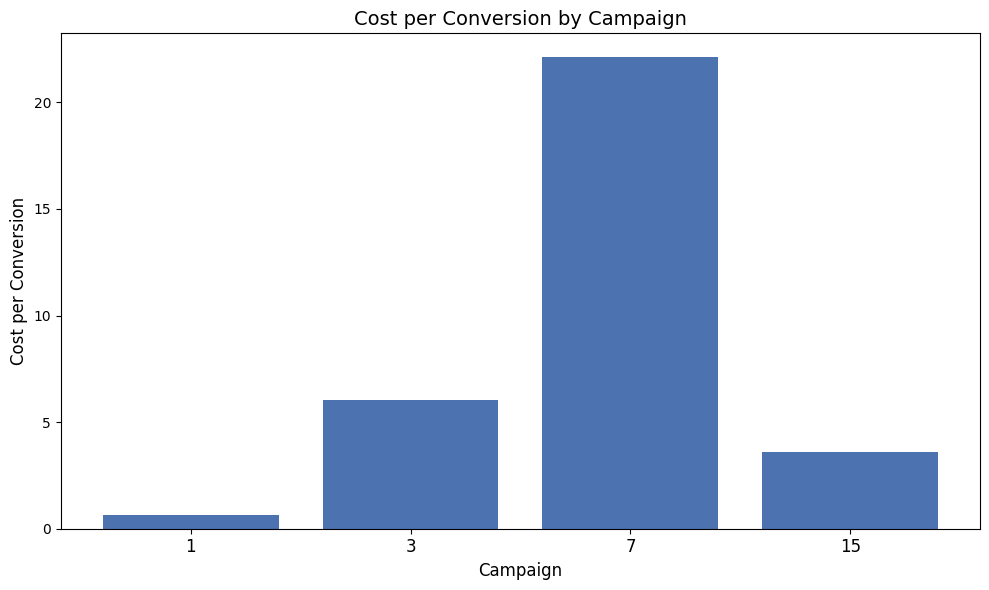

In [7]:
# Aggregating the data by Campaign
campaign_efficiency = df.groupby('Campaign').agg({
    'Cost': 'sum',
    'Conversions': 'sum'
}).reset_index()

# Calculating Cost per Conversion
campaign_efficiency['Cost_per_Conversion'] = campaign_efficiency['Cost'] / campaign_efficiency['Conversions']

print(campaign_efficiency)

# Converting Campaign values to strings to use as categorical labels
campaign_labels = campaign_efficiency['Campaign'].astype(str)

# Plotting a bar chart for Cost per Conversion by Campaign
plt.figure(figsize=(10, 6))
plt.bar(campaign_labels, campaign_efficiency['Cost_per_Conversion'], color='#4C72B0')  # using a professional muted blue
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Cost per Conversion', fontsize=12)
plt.title('Cost per Conversion by Campaign', fontsize=14)
plt.xticks(campaign_labels, fontsize=12)  # set x-axis ticks to only show the unique campaign labels
plt.tight_layout()
plt.savefig('cost_per_conversion_by_campaign.png', dpi=300)
plt.show()

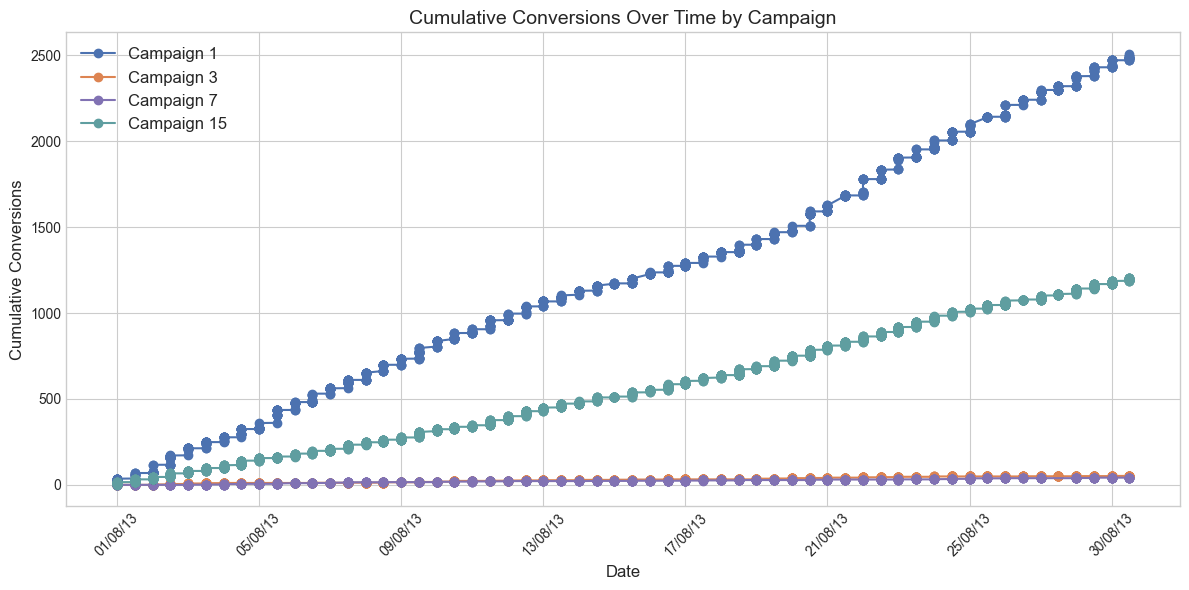

In [8]:
df_sorted = df.sort_values('Day')

# Getting unique campaign identifiers (sorted)
campaigns = sorted(df_sorted['Campaign'].unique())

# Defining colors for each campaign
colors = {
    1: '#4C72B0',   # muted blue
    3: '#DD8452',   # muted orange
    7: '#8172B3',   # muted purple
    15: '#5F9EA0'   # muted teal
}

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

# Plotting cumulative conversions for each campaign
for camp in campaigns:
    # Filtering data for the current campaign
    df_camp = df_sorted[df_sorted['Campaign'] == camp].copy()
    # Calculating cumulative conversions
    df_camp['Cumulative Conversions'] = df_camp['Conversions'].cumsum()
    
    # Plotting the line with markers
    plt.plot(df_camp['Day'], df_camp['Cumulative Conversions'],
             marker='o', color=colors.get(camp),
             label=f'Campaign {camp}')

# Limiting the x-axis ticks to 10 dates
plt.gca().xaxis.set_major_locator(MaxNLocator(10))

plt.ylabel('Cumulative Conversions', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Cumulative Conversions Over Time by Campaign', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cumulative_conversions_by_campaign.png', dpi=300)
plt.show()

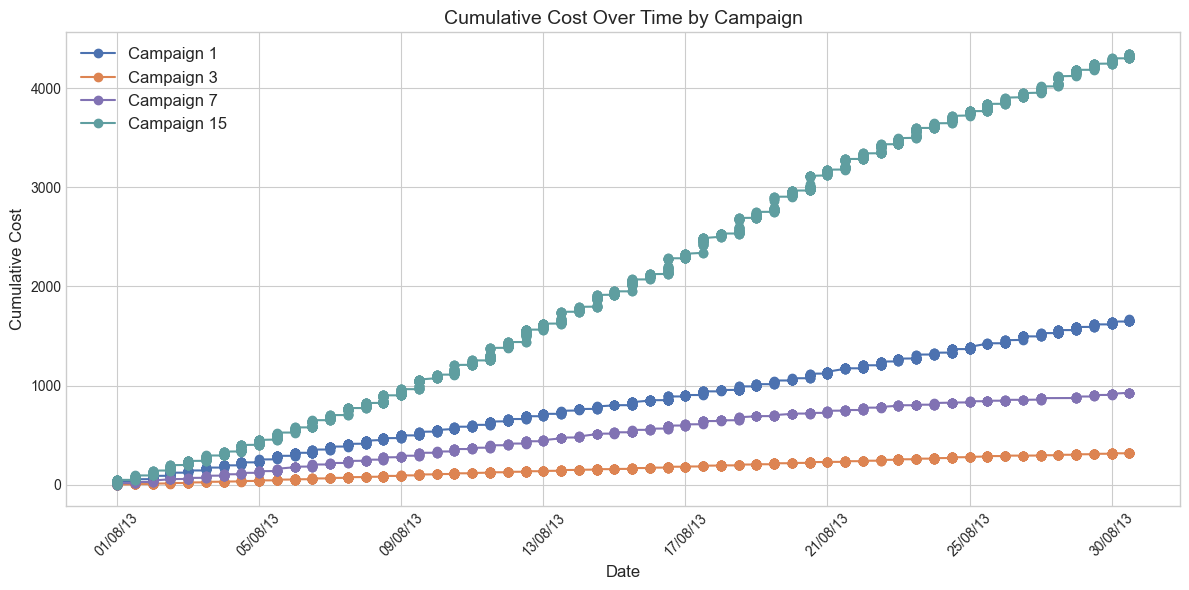

In [9]:
# Defining preferred muted colors for each campaign
colors = {
    1: '#4C72B0',   # muted blue
    3: '#DD8452',   # muted orange
    7: '#8172B3',   # muted purple
    15: '#5F9EA0'   # muted teal
}

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

# Plotting cumulative cost for each campaign
for camp in campaigns:
    # Filtering data for the current campaign
    df_camp = df_sorted[df_sorted['Campaign'] == camp].copy()
    # Calculating cumulative cost
    df_camp['Cumulative Cost'] = df_camp['Cost'].cumsum()
    
    # Plotting the line with markers
    plt.plot(df_camp['Day'], df_camp['Cumulative Cost'],
             marker='o', color=colors.get(camp),
             label=f'Campaign {camp}')

# Limiting the x-axis ticks to 10 dates
plt.gca().xaxis.set_major_locator(MaxNLocator(10))

plt.ylabel('Cumulative Cost', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Cumulative Cost Over Time by Campaign', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cumulative_cost_by_campaign.png', dpi=300)
plt.show()

C:\Users\danai\AppData\Local\Temp\ipykernel_39768\4262676795.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Day'] = pd.to_datetime(df['Day'], dayfirst=True)
C:\Users\danai\AppData\Local\Temp\ipykernel_39768\4262676795.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Campaign', 'Day_of_Week']).agg({


    Campaign Day_of_Week  Conversions  Cost
0          1      Monday          379   255
1          1     Tuesday          340   245
2          1   Wednesday          338   234
3          1    Thursday          426   277
4          1      Friday          420   280
5          1    Saturday          325   185
6          1      Sunday          281   194
7          3      Monday           11    49
8          3     Tuesday            9    45
9          3   Wednesday            6    43
10         3    Thursday            6    43
11         3      Friday            7    56
12         3    Saturday            9    40
13         3      Sunday            5    45
14         7      Monday            3   136
15         7     Tuesday            7   150
16         7   Wednesday            7   141
17         7    Thursday            4   141
18         7      Friday            4   127
19         7    Saturday            8   121
20         7      Sunday            9   114
21        15      Monday        

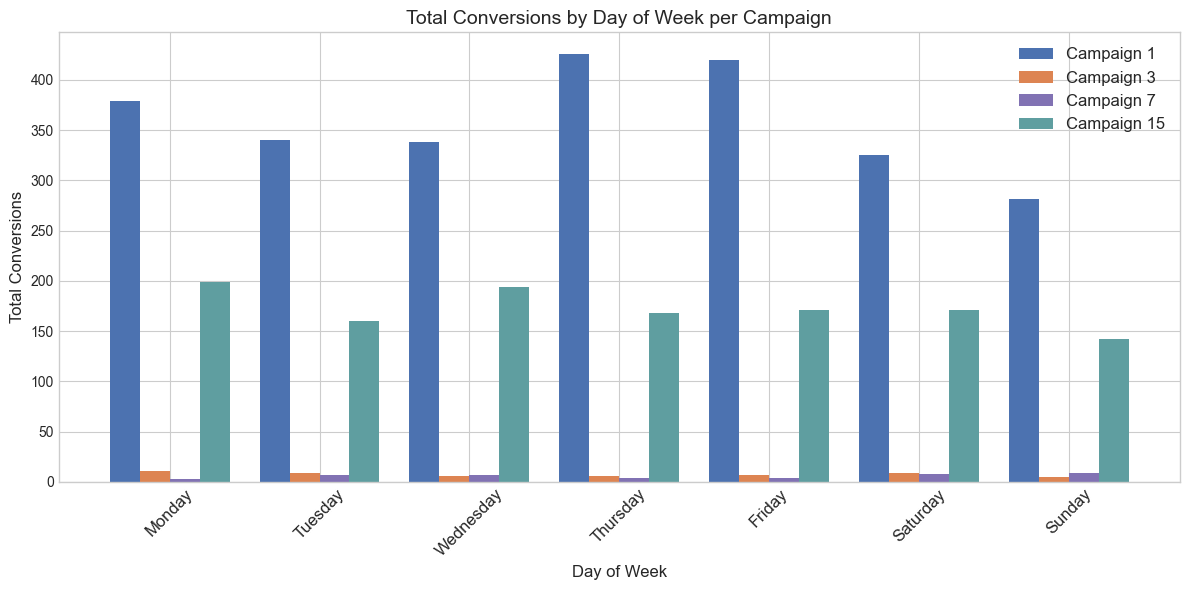

In [12]:
df['Day'] = pd.to_datetime(df['Day'], dayfirst=True)
df['Day_of_Week'] = df['Day'].dt.day_name()
# Defining the logical order for the days of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day_of_Week'] = pd.Categorical(df['Day_of_Week'], categories=order, ordered=True)

# Grouping by Campaign and Day_of_Week, summing the Conversions and Cost
grouped = df.groupby(['Campaign', 'Day_of_Week']).agg({
    'Conversions': 'sum',
    'Cost': 'sum'
}).reset_index()

print(grouped)

# Getting unique campaigns and using the ordered days for the x-axis
campaigns = sorted(df['Campaign'].unique())
days = order

# Defining colors for each campaign
colors = {
    1: '#4C72B0',   # muted blue
    3: '#DD8452',   # muted orange
    7: '#8172B3',   # muted purple
    15: '#5F9EA0'   # muted teal
}

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.2  # width of each bar
x = np.arange(len(days))  # positions for days of the week

for i, camp in enumerate(campaigns):
    # Filtering data for the current campaign
    camp_data = grouped[grouped['Campaign'] == camp]
    # For each day in the ordered week, get the total conversions; if missing, use 0
    conv_values = [
        camp_data[camp_data['Day_of_Week'] == day]['Conversions'].values[0] 
        if not camp_data[camp_data['Day_of_Week'] == day]['Conversions'].empty else 0 
        for day in days
    ]
    
    # Calculating the bar positions for this campaign
    bar_positions = x + (i - len(campaigns)/2) * width + width/2
    ax.bar(bar_positions, conv_values, width=width,
           label=f'Campaign {camp}', color=colors.get(camp))

# Setting the x-axis labels to the days of the week
ax.set_xticks(x)
ax.set_xticklabels(days, fontsize=12, rotation=45)
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Total Conversions', fontsize=12)
ax.set_title('Total Conversions by Day of Week per Campaign', fontsize=14)
ax.legend(fontsize=12)

plt.tight_layout()
plt.savefig('conversions_by_campaign_day.png', dpi=300)
plt.show()

In [13]:
# Aggregating data by AdGroup
adgroup_summary = df.groupby('AdGroup').agg({
    'Clicks': 'sum',
    'Impressions': 'sum',
    'View-through conv.': 'sum', 
    'Avg. position': 'mean'
}).reset_index()

# Calculating CTR as a percentage (if impressions are > 0)
adgroup_summary['CTR'] = (adgroup_summary['Clicks'] / adgroup_summary['Impressions']) * 100

# Viewing the summary for a few ad groups
print(adgroup_summary.head(10))

   AdGroup  Clicks  Impressions  View-through conv.  Avg. position  CTR
0      100      10           45                   0              1   22
1      101     267          841                   0              1   32
2      102     439          795                   0              1   55
3      103     149          174                   0              1   86
4      104   11870        20048                   0              1   59
5      105     204          323                   0              1   63
6      106      28           57                   0              1   49
7      107    1026         1858                   0              1   55
8      108    1009         1409                   0              1   72
9      109      72          145                   0              1   50


In [14]:
# Aggregating data by AdGroup
adgroup_summary = df.groupby('AdGroup').agg({
    'Conversions': 'sum',
    'Cost': 'sum'
}).reset_index()

# Calculating Cost per Conversion, handling division by zero gracefully
adgroup_summary['Cost_per_Conversion'] = adgroup_summary.apply(
    lambda row: row['Cost'] / row['Conversions'] if row['Conversions'] > 0 else np.nan, axis=1
)

print(adgroup_summary.head(10))  # Printing first 10 rows for inspection

   AdGroup  Conversions  Cost  Cost_per_Conversion
0      100            0     0                  NaN
1      101           10    14                    1
2      102            5    11                    2
3      103            8     3                    0
4      104          438   300                    1
5      105            8     5                    1
6      106            0     0                  NaN
7      107           40    40                    1
8      108           16    25                    2
9      109            1     3                    3


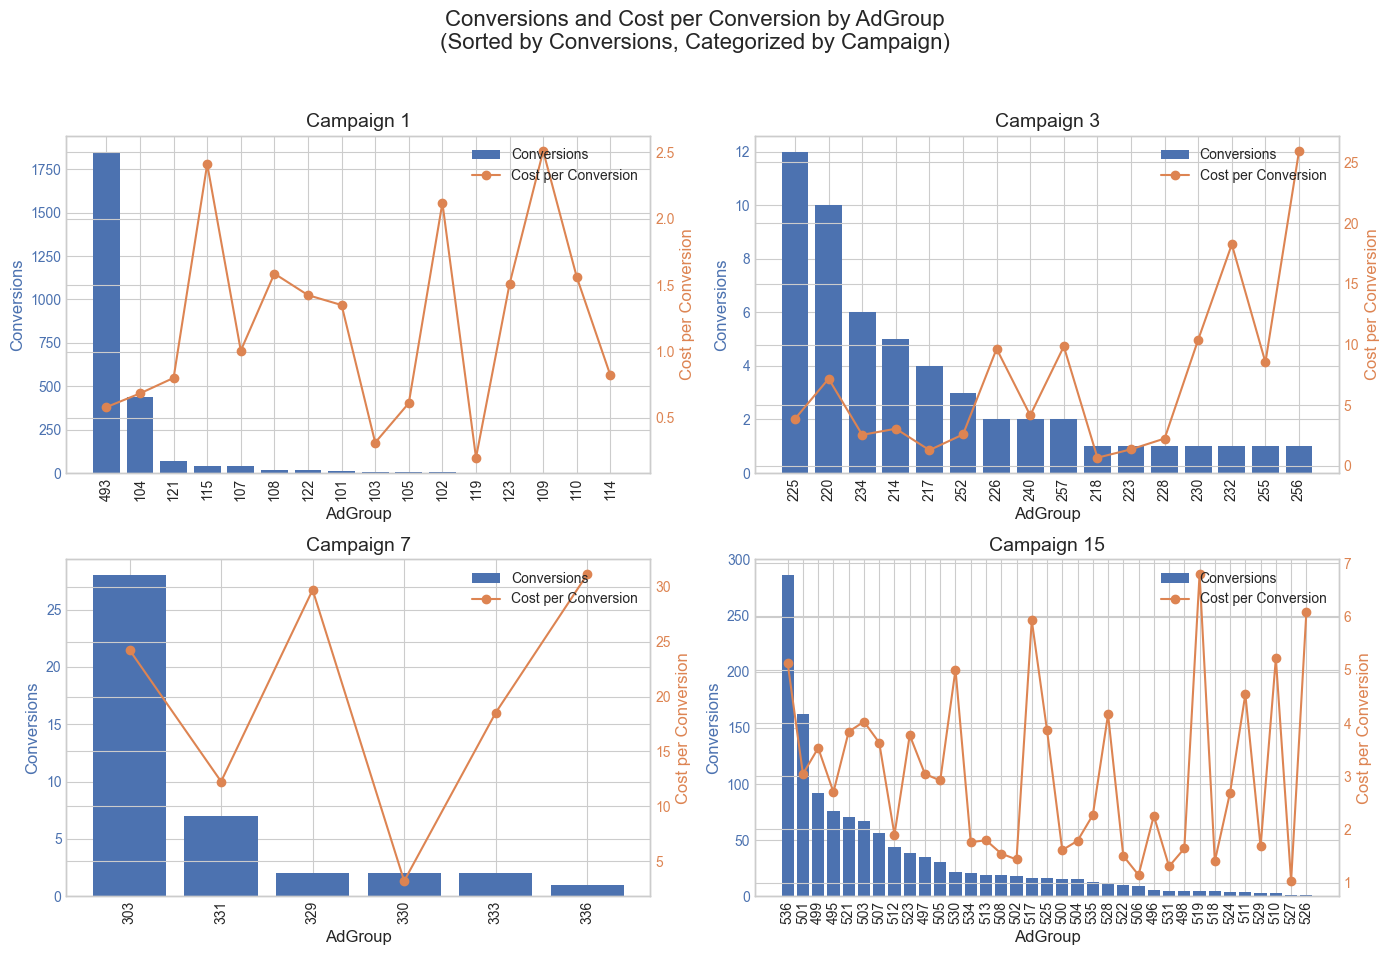

In [15]:
# Grouping data by Campaign and AdGroup to get total conversions and cost
grouped_adgroups = df.groupby(['Campaign', 'AdGroup']).agg({
    'Conversions': 'sum',
    'Cost': 'sum'
}).reset_index()

# Excluding adgroups with 0 conversions
grouped_adgroups = grouped_adgroups[grouped_adgroups['Conversions'] > 0]

# Calculating cost per conversion; if no conversions, assign NaN
grouped_adgroups['Cost_per_Conversion'] = grouped_adgroups.apply(
    lambda row: row['Cost'] / row['Conversions'] if row['Conversions'] > 0 else np.nan, axis=1
)

# Getting unique campaigns
campaigns = sorted(df['Campaign'].unique())

# Creating subplots: one subplot per campaign 
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False)
axes = axes.flatten()

for i, camp in enumerate(campaigns):
    # Filtering data for the current campaign and sort by Conversions (highest first)
    data_camp = grouped_adgroups[grouped_adgroups['Campaign'] == camp]
    data_camp = data_camp.sort_values('Conversions', ascending=False)
    
    ax = axes[i]
    # Plotting total conversions as bars on the left y-axis
    bars = ax.bar(data_camp['AdGroup'].astype(str), data_camp['Conversions'], 
                  color='#4C72B0', label='Conversions')
    ax.set_xlabel('AdGroup', fontsize=12)
    ax.set_ylabel('Conversions', fontsize=12, color='#4C72B0')
    ax.tick_params(axis='y', labelcolor='#4C72B0')
    ax.set_title(f'Campaign {camp}', fontsize=14)
    # Setting x-axis labels vertical
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    
    # Creating a secondary y-axis for cost per conversion
    ax2 = ax.twinx()
    ax2.plot(data_camp['AdGroup'].astype(str), data_camp['Cost_per_Conversion'], 
             color='#DD8452', marker='o', label='Cost per Conversion')
    ax2.set_ylabel('Cost per Conversion', fontsize=12, color='#DD8452')
    ax2.tick_params(axis='y', labelcolor='#DD8452')
    
    # Combining legends from both axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=10)

plt.suptitle('Conversions and Cost per Conversion by AdGroup\n(Sorted by Conversions, Categorized by Campaign)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('combined_adgroup_analysis_sorted_no_nbins_vertical.png', dpi=300)
plt.show()

   Campaign  CTR_numeric
0         1           53
1         3           38
2         7           24
3        15            1


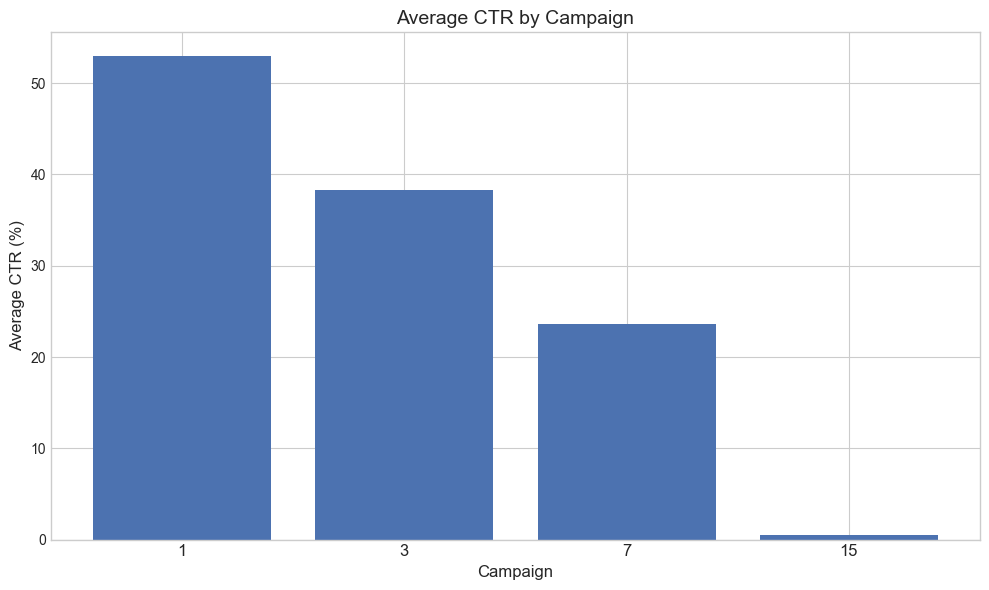

In [16]:
if df['CTR'].dtype == object:
    # Removing the "%" sign and convert to float
    df['CTR_numeric'] = df['CTR'].str.rstrip('%').astype('float')
else:
    df['CTR_numeric'] = df['CTR']

# Grouping by Campaign: Calculating the average CTR for each campaign
campaign_ctr = df.groupby('Campaign')['CTR_numeric'].mean().reset_index()

print(campaign_ctr)

# Converting campaign numbers to strings for labeling
campaign_labels = campaign_ctr['Campaign'].astype(str)

# Plotting the average CTR per campaign
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
plt.bar(campaign_labels, campaign_ctr['CTR_numeric'], color='#4C72B0')
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Average CTR (%)', fontsize=12)
plt.title('Average CTR by Campaign', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig('ctr_by_campaign_existing.png', dpi=300)
plt.show()

In [17]:
# Ensuring Clicks and Impressions are numeric
df['Clicks'] = pd.to_numeric(df['Clicks'], errors='coerce')
df['Impressions'] = pd.to_numeric(df['Impressions'], errors='coerce')

# Groupping by Campaign and AdGroup to get total clicks and impressions per adgroup
adgroup_ctr = df.groupby(['Campaign', 'AdGroup']).agg({
    'Clicks': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Calculating CTR per adgroup as a percentage
adgroup_ctr['CTR'] = (adgroup_ctr['Clicks'] / adgroup_ctr['Impressions']) * 100

print(adgroup_ctr.head(10))

   Campaign  AdGroup  Clicks  Impressions  CTR
0         1      100      10           45   22
1         1      101     267          841   32
2         1      102     439          795   55
3         1      103     149          174   86
4         1      104   11870        20048   59
5         1      105     204          323   63
6         1      106      28           57   49
7         1      107    1026         1858   55
8         1      108    1009         1409   72
9         1      109      72          145   50


    Campaign  AdGroup  Clicks  Impressions  CTR
1          1      101     267          841   32
2          1      102     439          795   55
3          1      103     149          174   86
4          1      104   11870        20048   59
5          1      105     204          323   63
6          1      106      28           57   49
7          1      107    1026         1858   55
8          1      108    1009         1409   72
9          1      109      72          145   50
10         1      110      30           54   56


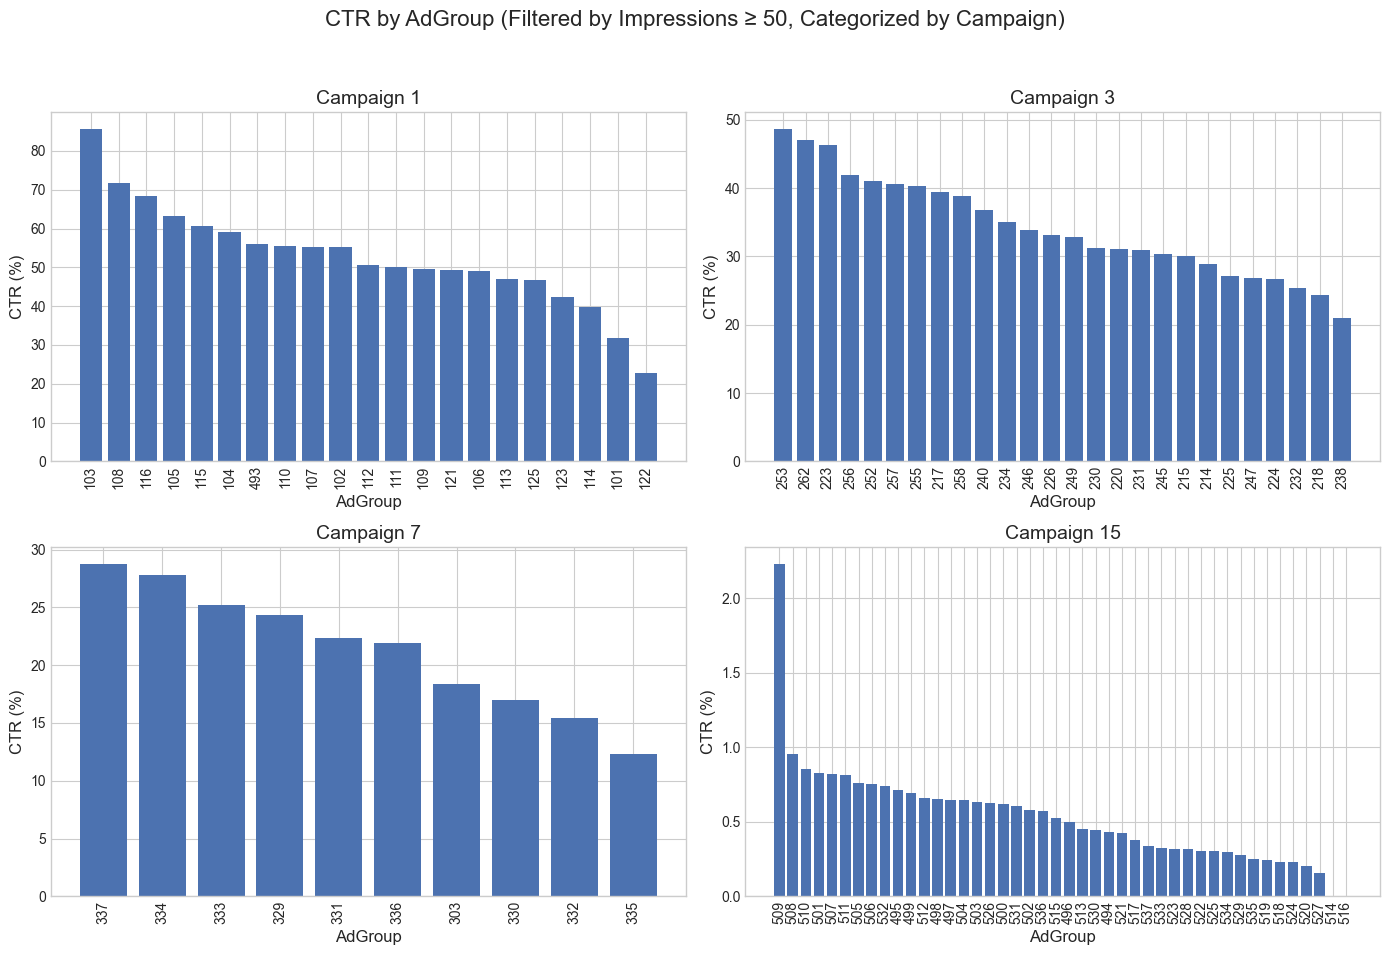

In [18]:
# Groupping by Campaign and AdGroup to get total clicks and impressions per adgroup
adgroup_ctr = df.groupby(['Campaign', 'AdGroup']).agg({
    'Clicks': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Filtering out adgroups with fewer than 50 impressions
threshold = 50
adgroup_ctr = adgroup_ctr[adgroup_ctr['Impressions'] >= threshold]

# Calculating CTR per adgroup as a percentage
adgroup_ctr['CTR'] = (adgroup_ctr['Clicks'] / adgroup_ctr['Impressions']) * 100

print(adgroup_ctr.head(10))

# Getting unique campaigns
campaigns = sorted(df['Campaign'].unique())

# Creating subplots: one subplot per campaign 
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False)
axes = axes.flatten()

# Defining a color
bar_color = '#4C72B0'

for i, camp in enumerate(campaigns):
    # Filtering data for the current campaign
    data_camp = adgroup_ctr[adgroup_ctr['Campaign'] == camp]
    # Sorting by CTR in descending order for better visualization
    data_camp = data_camp.sort_values('CTR', ascending=False)
    
    ax = axes[i]
    # Plotting  a bar chart for CTR by AdGroup
    ax.bar(data_camp['AdGroup'].astype(str), data_camp['CTR'], color=bar_color)
    ax.set_title(f'Campaign {camp}', fontsize=14)
    ax.set_xlabel('AdGroup', fontsize=12)
    ax.set_ylabel('CTR (%)', fontsize=12)
    # Rotating x-axis labels vertically for readability
    ax.tick_params(axis='x', rotation=90, labelsize=10)

plt.suptitle('CTR by AdGroup (Filtered by Impressions ≥ 50, Categorized by Campaign)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('ctr_by_adgroup_filtered.png', dpi=300)
plt.show()

   Campaign  Total conv. value
0         1             159383
1         3               4731
2         7               3188
3        15              73338


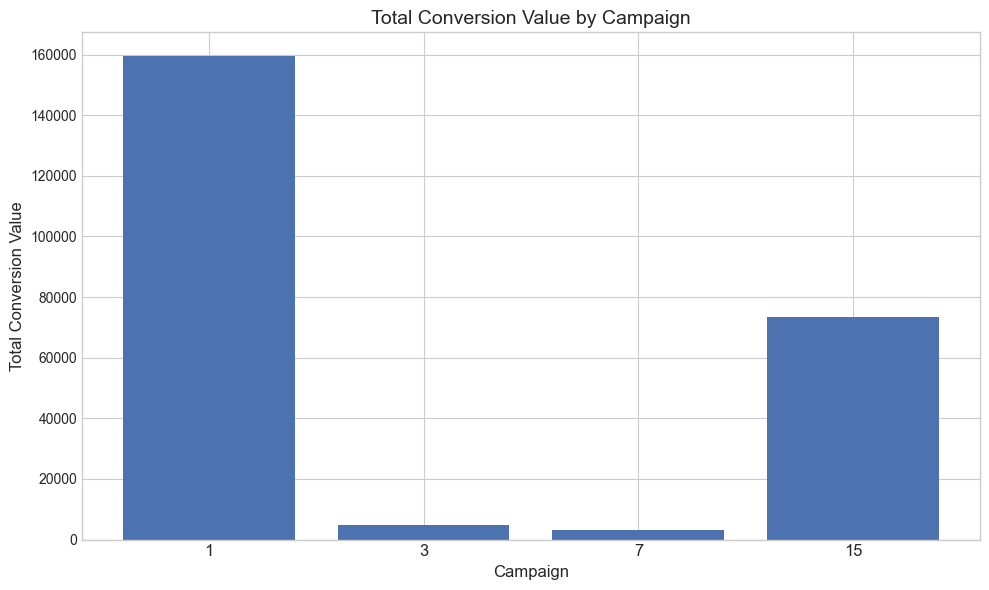

In [19]:
# Ensuring the "Total conv. value" column is numeric
df['Total conv. value'] = pd.to_numeric(df['Total conv. value'], errors='coerce')

# Grouping by Campaign and summing up the Total Conversion Value
campaign_conv_value = df.groupby('Campaign').agg({
    'Total conv. value': 'sum'
}).reset_index()

print(campaign_conv_value)

# Converting campaign numbers to strings for labeling
campaign_labels = campaign_conv_value['Campaign'].astype(str)

# Style
plt.style.use('seaborn-v0_8-whitegrid')

# Plotting a bar chart for Total Conversion Value by Campaign
plt.figure(figsize=(10, 6))
plt.bar(campaign_labels, campaign_conv_value['Total conv. value'], color='#4C72B0')
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Total Conversion Value', fontsize=12)
plt.title('Total Conversion Value by Campaign', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig('total_conversion_value_by_campaign.png', dpi=300)
plt.show()

In [20]:
# Groupping data by Campaign and calculating total cost and total conversion value
campaign_roas = df.groupby('Campaign').agg({
    'Cost': 'sum',
    'Total conv. value': 'sum'
}).reset_index()

# Calculating ROAS (if cost > 0 to avoid division by zero)
campaign_roas['ROAS'] = campaign_roas.apply(
    lambda row: row['Total conv. value'] / row['Cost'] if row['Cost'] > 0 else None, axis=1
)

print(campaign_roas)

   Campaign  Cost  Total conv. value  ROAS
0         1  1669             159383    95
1         3   321               4731    15
2         7   930               3188     3
3        15  4345              73338    17


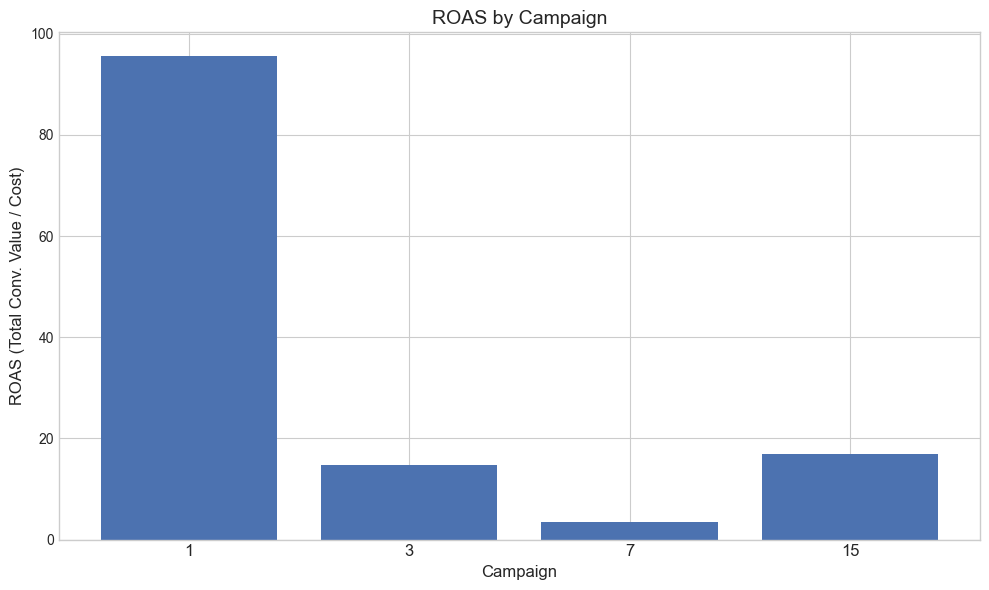

In [21]:
# Converting campaign identifiers to strings for labeling
campaign_labels = campaign_roas['Campaign'].astype(str)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
plt.bar(campaign_labels, campaign_roas['ROAS'], color='#4C72B0')
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('ROAS (Total Conv. Value / Cost)', fontsize=12)
plt.title('ROAS by Campaign', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig('roas_by_campaign.png', dpi=300)
plt.show()

   Campaign  Cost  Total conv. value  Conversions  ROAS
0         1  1669             159383         2509    95
1         3   321               4731           53    15
2         7   930               3188           42     3
3        15  4345              73338         1205    17


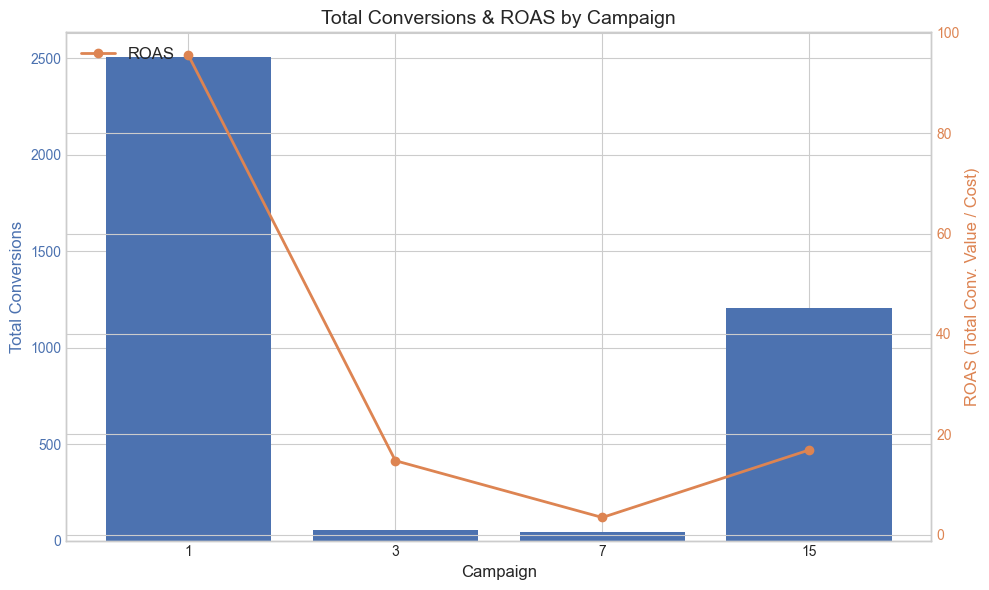

In [22]:
# Ensuring numeric conversion for necessary columns
df['Total conv. value'] = pd.to_numeric(df['Total conv. value'], errors='coerce')
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')
df['Conversions'] = pd.to_numeric(df['Conversions'], errors='coerce')

# Aggregating data by Campaign
campaign_summary = df.groupby('Campaign').agg({
    'Cost': 'sum',
    'Total conv. value': 'sum',
    'Conversions': 'sum'
}).reset_index()

# Calculating ROAS (Total Conversion Value / Cost)
campaign_summary['ROAS'] = campaign_summary.apply(
    lambda row: row['Total conv. value'] / row['Cost'] if row['Cost'] > 0 else None, axis=1
)

print(campaign_summary)

# Converting campaign numbers to strings for labeling
campaign_labels = campaign_summary['Campaign'].astype(str)

# Style
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Creating a bar chart for total conversions (left y-axis)
bars = plt.bar(campaign_labels, campaign_summary['Conversions'], color='#4C72B0', label='Conversions')
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Total Conversions', fontsize=12, color='#4C72B0')
plt.tick_params(axis='y', labelcolor='#4C72B0')
plt.title('Total Conversions & ROAS by Campaign', fontsize=14)

# Creating a secondary y-axis for ROAS
ax2 = plt.twinx()
ax2.plot(campaign_labels, campaign_summary['ROAS'], color='#DD8452', marker='o', linewidth=2, label='ROAS')
ax2.set_ylabel('ROAS (Total Conv. Value / Cost)', fontsize=12, color='#DD8452')
ax2.tick_params(axis='y', labelcolor='#DD8452')

# Combining legends
lines1, labels1 = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1, loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig('conversions_and_roas_by_campaign.png', dpi=300)
plt.show()

   Campaign  Avg. position
0         1              1
1         3              1
2         7              1
3        15              1


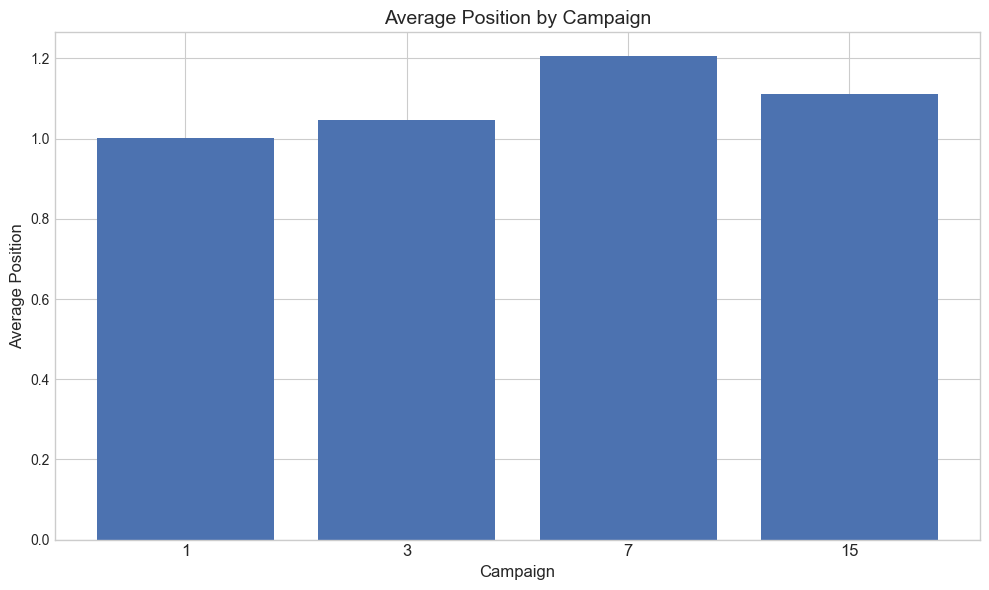

In [23]:
# Ensuring 'Avg. position' is numeric (if not already)
df['Avg. position'] = pd.to_numeric(df['Avg. position'], errors='coerce')

# Groupping by Campaign and calculating the average ad position
campaign_avg_position = df.groupby('Campaign')['Avg. position'].mean().reset_index()

print(campaign_avg_position)

# Converting campaign identifiers to strings for labeling
campaign_labels = campaign_avg_position['Campaign'].astype(str)

# Style
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Creating a bar chart for average position by campaign
plt.bar(campaign_labels, campaign_avg_position['Avg. position'], color='#4C72B0', label='ROAS')
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Average Position', fontsize=12)
plt.title('Average Position by Campaign', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig('avg_position_by_campaign.png', dpi=300)
plt.show()

   Campaign  Cost  Conversions  Cost_per_Conversion
0         1  1669         2509                    1
1         3   321           53                    6
2         7   930           42                   22
3        15  4345         1205                    4


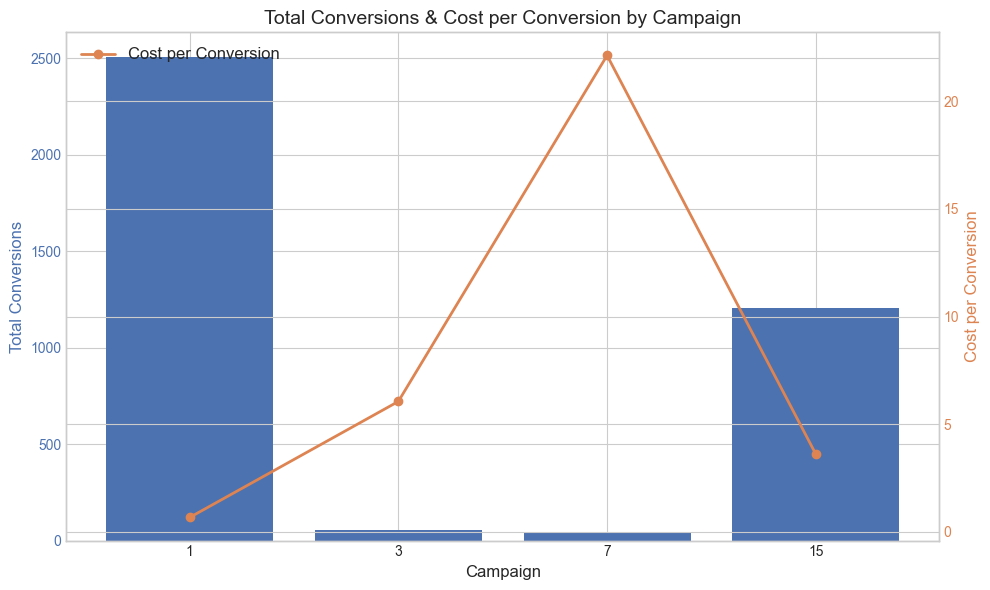

In [29]:
# Aggregating data by Campaign
campaign_summary = df.groupby('Campaign').agg({
    'Cost': 'sum',
    'Conversions': 'sum'
}).reset_index()

# Calculating Cost per Conversion; if no conversions, setting to None to avoid division by zero
campaign_summary['Cost_per_Conversion'] = campaign_summary.apply(
    lambda row: row['Cost'] / row['Conversions'] if row['Conversions'] > 0 else None,
    axis=1
)

print(campaign_summary)

# Converting campaign numbers to strings for labeling
campaign_labels = campaign_summary['Campaign'].astype(str)

# Setting a professional style and creating a figure
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Plotting total conversions as bars on the left y-axis
bars = plt.bar(campaign_labels, campaign_summary['Conversions'], color='#4C72B0', label='Total Conversions')
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Total Conversions', fontsize=12, color='#4C72B0')
plt.tick_params(axis='y', labelcolor='#4C72B0')
plt.title('Total Conversions & Cost per Conversion by Campaign', fontsize=14)

# Creating a secondary y-axis for cost per conversion
ax2 = plt.twinx()
line_cost = ax2.plot(campaign_labels, campaign_summary['Cost_per_Conversion'], color='#DD8452', 
                     marker='o', linewidth=2)
ax2.set_ylabel('Cost per Conversion', fontsize=12, color='#DD8452')
ax2.tick_params(axis='y', labelcolor='#DD8452')

# Combining legends: using the bar legend and the line handle from ax2
handles1, labels1 = plt.gca().get_legend_handles_labels()


plt.legend(handles1 + handles2, labels1 + labels2, loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig('combined_conversions_cost_per_conversion.png', dpi=300)
plt.show()